In [1]:
# loading libraries
import pyforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv('data/winequality-red.csv')
# data distribution
df.head()

<IPython.core.display.Javascript object>

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# info abt wine columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Plotting to see column data distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='quality', ylabel='fixed acidity'>

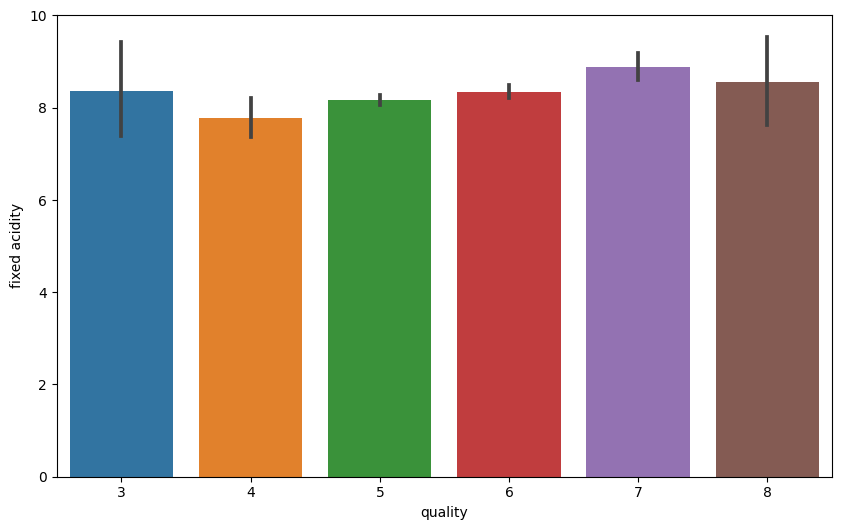

In [4]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='fixed acidity', data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='quality', ylabel='volatile acidity'>

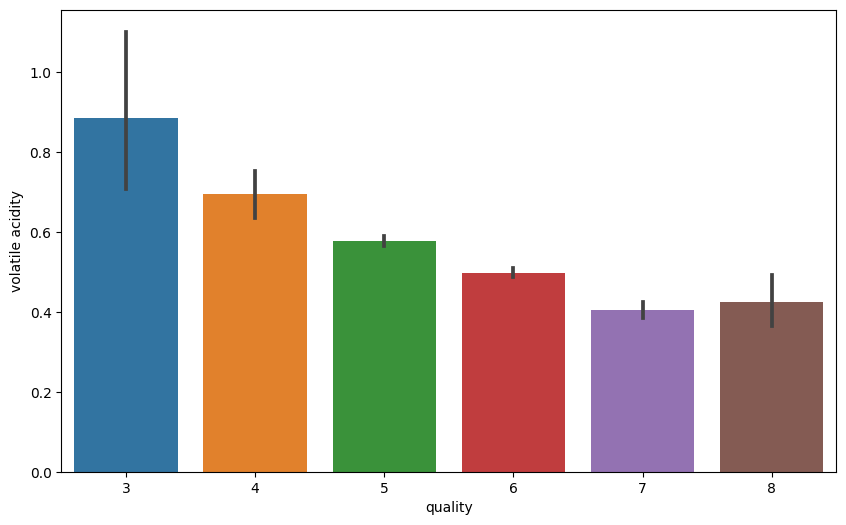

In [5]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=df)
# the quality of wine increase as volatile acidity reduces

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='quality', ylabel='citric acid'>

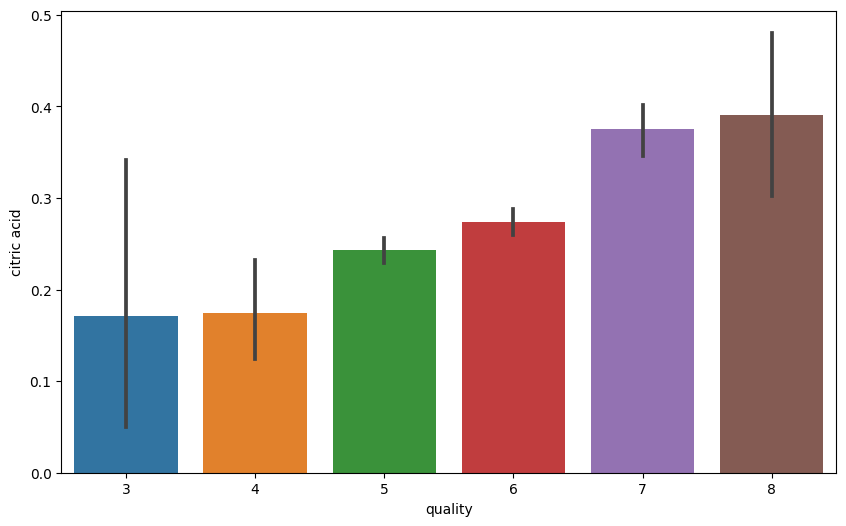

In [6]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='citric acid', data=df)
# quality of wine goes up as citric acid levels increases

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='quality', ylabel='residual sugar'>

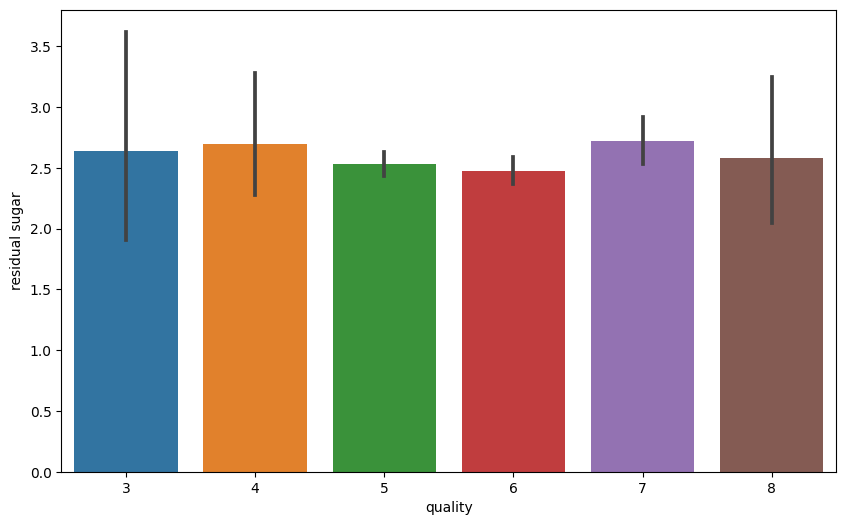

In [7]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='residual sugar', data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='quality', ylabel='chlorides'>

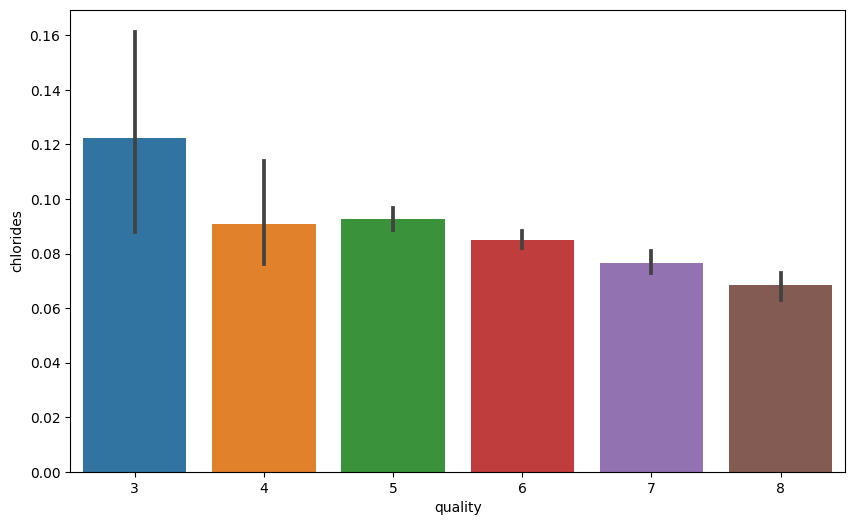

In [8]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='chlorides', data=df)
# low levels of chlorides implies good quality of wine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

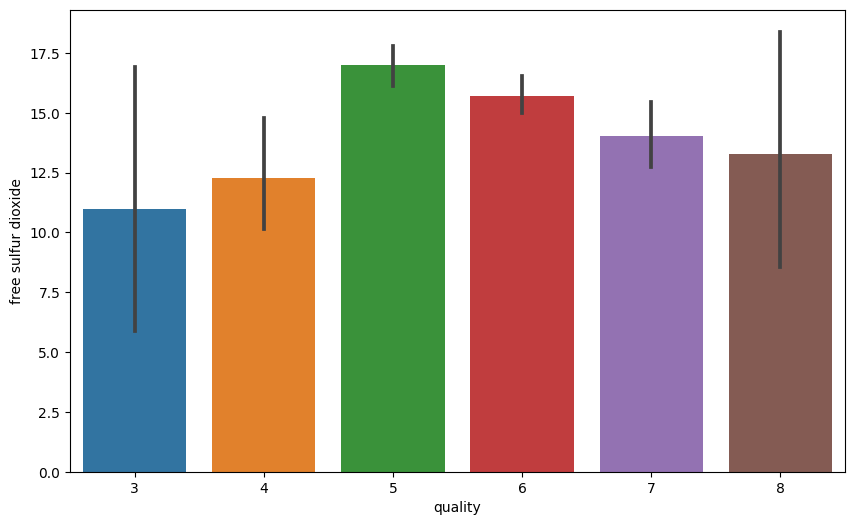

In [9]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

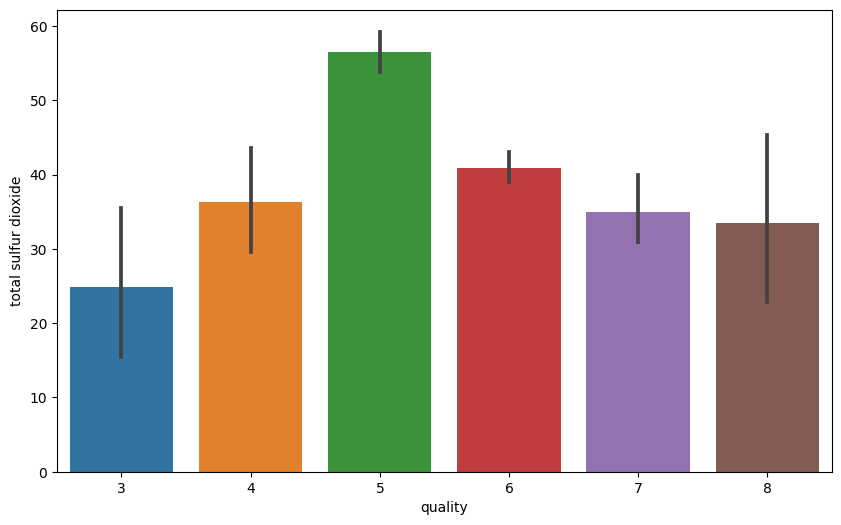

In [10]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='quality', ylabel='sulphates'>

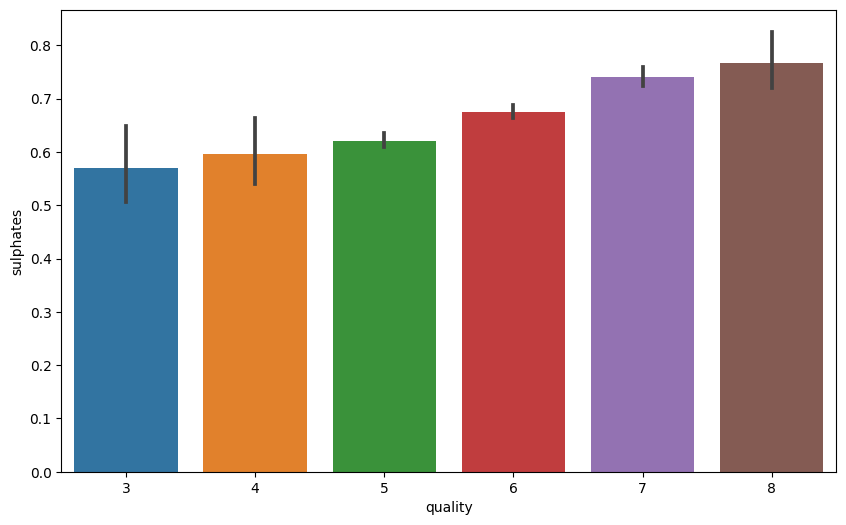

In [11]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='sulphates', data=df)
# high levels of sluphates increase quality of wine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='quality', ylabel='alcohol'>

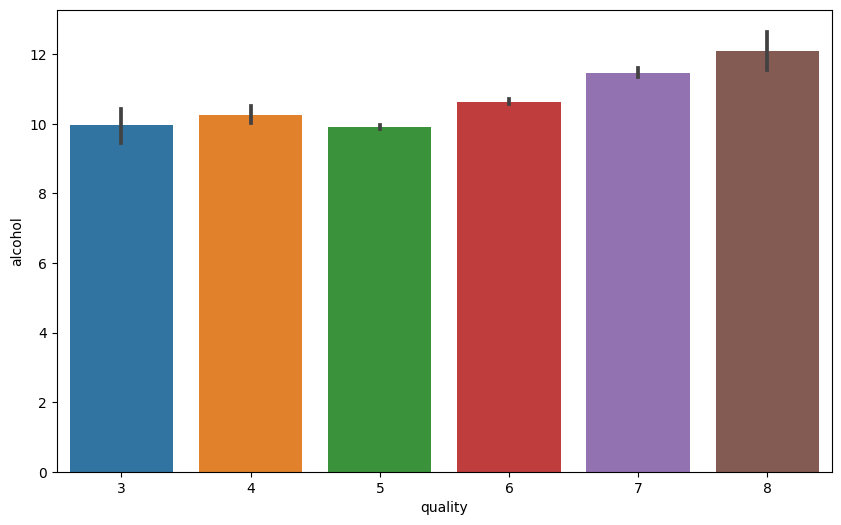

In [12]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=df)
# high levels of alcohol signifies qaulity wine

### Preprocessing data for ML models

In [13]:
# making binary classification for the response variable
# Dividing wine as good or bad by giving the limit of the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=group_names)

<IPython.core.display.Javascript object>

In [14]:
# labeling wine quality to 1 and 0 (good and bad)
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: ylabel='quality'>

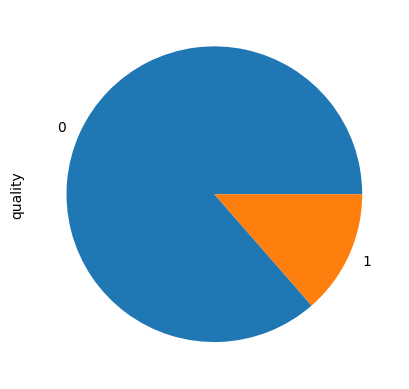

In [16]:
# sns.countplot(df['quality'])
df['quality'].value_counts().plot(kind='pie')

In [17]:
# now separate dataset to response variable and feature variables
X = df.drop('quality', axis=1)
y = df['quality']

In [18]:
# Splitting data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# appyling std scaling to get optimized results
sc = StandardScaler()

In [20]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Random forest classifier

In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [22]:
# model performance
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.60      0.38      0.47        47

    accuracy                           0.87       320
   macro avg       0.75      0.67      0.70       320
weighted avg       0.86      0.87      0.86       320



In [23]:
# confusion matrix for Random forest classifier
print(confusion_matrix(y_test, pred_rfc))

[[261  12]
 [ 29  18]]


### Stochastic gradient Decent Classifier

In [24]:
sgdc = SGDClassifier(penalty=None)
sgdc.fit(X_train, y_train)
pred_sgdc = sgdc.predict(X_test)

In [25]:
# model performance
print(classification_report(y_test, pred_sgdc))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       273
           1       0.68      0.28      0.39        47

    accuracy                           0.88       320
   macro avg       0.79      0.63      0.66       320
weighted avg       0.86      0.88      0.85       320



In [26]:
# confusion matrix for SGDC
print(confusion_matrix(y_test, pred_sgdc))

[[267   6]
 [ 34  13]]


### Support vector Classifier

In [27]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [28]:
# model performance
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



### Increase model accuracy